In [40]:
import shap
import pandas as pd
import joblib
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance

In [43]:
df_train = pd.read_csv('./data/processed_data/train.csv')
df_test = pd.read_csv('./data/processed_data/test.csv')

X_train = df_train.drop(columns=['target'])
X_test = df_test.drop(columns=['target'])

y_train = df_train[['target']]
y_test = df_test[['target']]

In [17]:
model = joblib.load('./models/lgb.pkl')

In [19]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


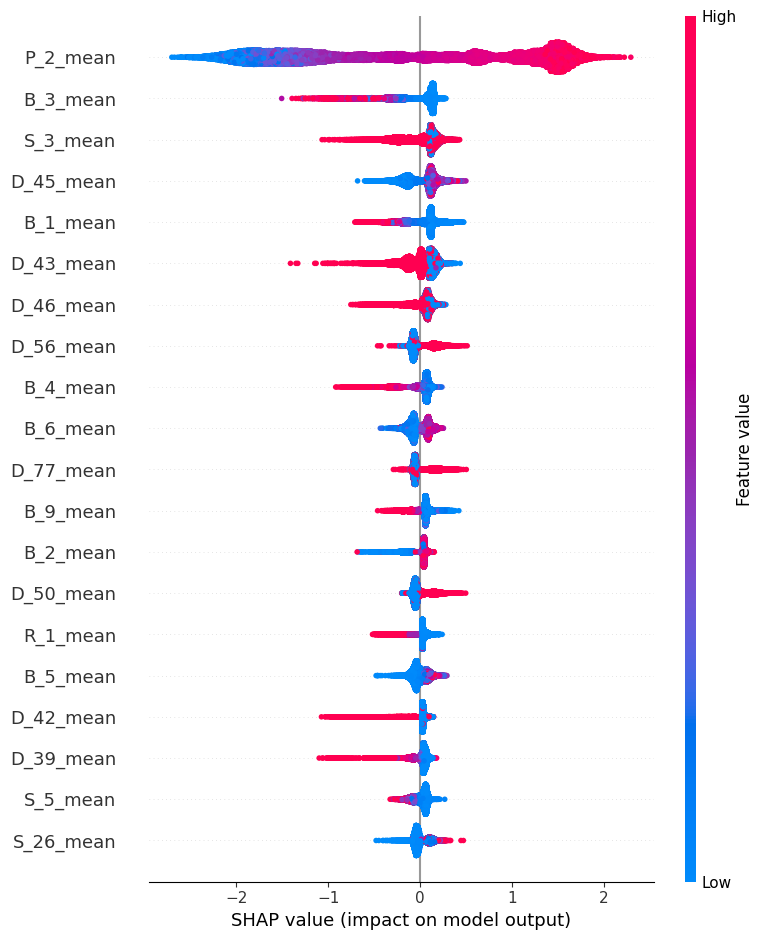

In [34]:
shap.summary_plot(shap_values[0], X_train)

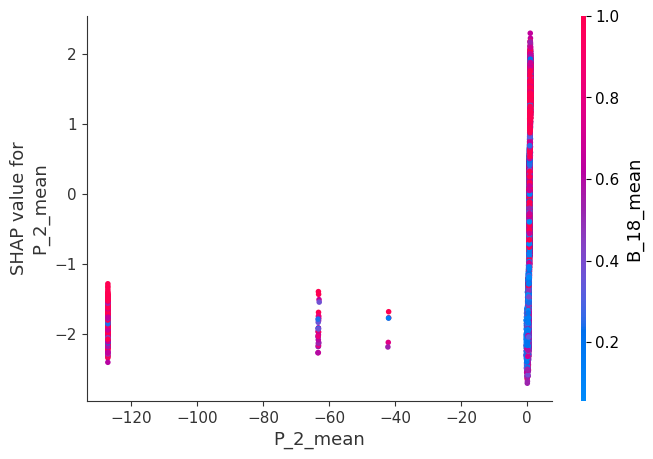

In [39]:
shap.dependence_plot("P_2_mean", shap_values[0], X_train)

In [60]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0455 ± 0.0030,P_2_mean
0.0042 ± 0.0013,D_45_mean
0.0024 ± 0.0005,D_42_mean
0.0021 ± 0.0017,B_1_mean
0.0020 ± 0.0012,D_46_mean
0.0012 ± 0.0007,D_49_mean
0.0008 ± 0.0010,B_3_mean
0.0007 ± 0.0012,D_43_mean
0.0006 ± 0.0014,D_51_mean
0.0005 ± 0.0010,D_41_mean
